In [2]:
!pip install seaborn
import numpy as np
import seaborn as sns
import pandas as pd
np.random.seed(seed=42)


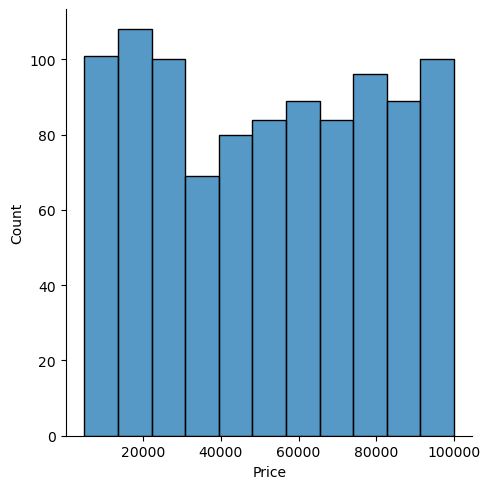

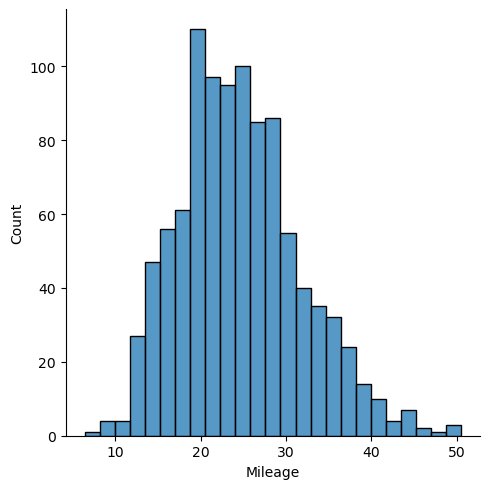

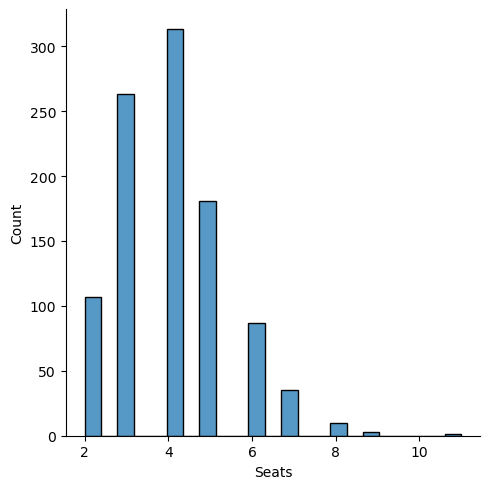

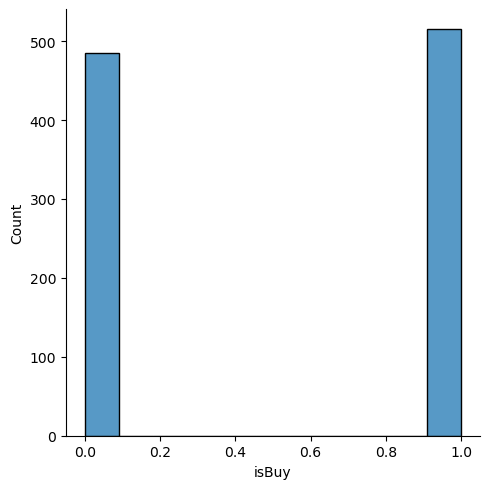

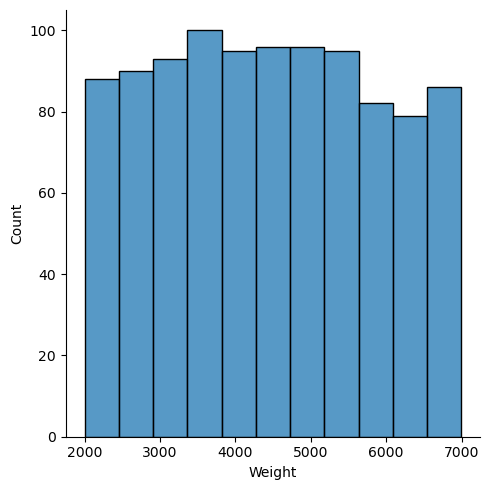

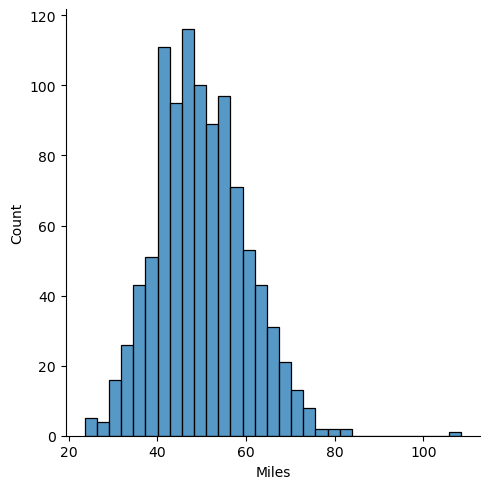

In [55]:
count = 1000
prices = np.random.randint(low=5000,high=100000,size=(count),dtype='int')
mileage = np.random.chisquare(df=25, size=(count))
cars = pd.DataFrame(data=prices, index=range(count), columns=['Price'])
cars['Mileage'] = mileage
cars['Seats'] = np.random.poisson(lam=2, size=count)+2
cars['isBuy'] = np.random.binomial(n=1,p=0.52, size=count)
cars['Weight'] = np.random.randint(low=2000,high=7000,size=(count),dtype='int')
cars['Miles'] = np.random.chisquare(df=50, size=(count))
sns.displot(data=cars, x="Price")
sns.displot(data=cars, x="Mileage")
sns.displot(data=cars, x="Seats")
sns.displot(data=cars, x="isBuy")
sns.displot(data=cars, x="Weight")
sns.displot(data=cars, x="Miles")


In [4]:
print(cars[['Mileage','Weight', 'Seats', 'Miles']])

       Mileage  Weight  Seats      Miles
0    14.071502    5738      2  47.557133
1    47.533059    4731      3  64.331049
2    29.081275    6007      2  47.685204
3    19.080372    2869      4  35.336021
4    22.874290    2093      2  38.880152
..         ...     ...    ...        ...
995  11.810236    5367      4  60.478105
996  22.340770    5951      4  63.299670
997  25.553175    4497      3  44.417577
998  17.666262    3573      6  54.768503
999  16.853770    4634      3  59.567824

[1000 rows x 4 columns]


In [5]:
from sklearn.model_selection import train_test_split
!pip install xgboost

# Splitting 
train_X, test_X, train_y, test_y = train_test_split(cars[['Mileage','Weight', 'Seats', 'Miles']], cars['Price'], 
                      test_size = 0.3, random_state = 123) 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.8 MB/s eta 0:00:00:00:0100:01


In [6]:
import xgboost as xg 
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.model_selection import GridSearchCV

# Instantiation 
xgb_r = xg.XGBRegressor(seed = 50) 

parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [50, 100, 500, 1000]}

xgb_grid = GridSearchCV(xgb_r,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)
  
# Fitting the model 
xgb_grid.fit(train_X, train_y) 

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
  
# Predict the model 
pred = xgb_grid.predict(test_X) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
-0.0741450209026766
{'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 50, 'objective': 'reg:squarederror'}
RMSE :  28091.705801


In [7]:
import xgboost as xg 
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.model_selection import GridSearchCV

# Instantiation 
xgb_r = xg.XGBRFRegressor(seed = 50) 

parameters = {'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [50, 100, 500, 1000]}

xgb_grid = GridSearchCV(xgb_r,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)
  
# Fitting the model 
xgb_grid.fit(train_X, train_y) 

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)
  
# Predict the model 
pred = xgb_grid.predict(test_X) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(test_y, pred)) 
print("RMSE : % f" %(rmse)) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
-0.018781354070470525
{'learning_rate': 0.07, 'max_depth': 5, 'n_estimators': 500, 'objective': 'reg:squarederror'}
RMSE :  27690.383568


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Splitting 
train_X, test_X, train_y, test_y = train_test_split(cars[['Mileage','Weight', 'Seats', 'Miles', 'Price']], cars['isBuy'], 
                      test_size = 0.3, random_state = 123) 

In [57]:
#initialize logistic regressor
isBuy_logistic_regressor = LogisticRegression(solver='liblinear')

In [58]:
isBuy_logistic_regressor.fit(train_X, train_y)




LogisticRegression(solver='liblinear')

In [59]:
test_proba = isBuy_logistic_regressor.predict_proba(test_X).tolist()
#print(test_proba)


In [60]:
type(test_proba)
pd.DataFrame(isBuy_logistic_regressor.predict_proba(test_X), columns=isBuy_logistic_regressor.classes_)

,0,1
0,0.492437,0.507563
1,0.459487,0.540513
2,0.423581,0.576419
3,0.459175,0.540825
4,0.509574,0.490426
...,...,...
295,0.519210,0.480790
296,0.554286,0.445714
297,0.504995,0.495005
298,0.367200,0.632800


In [70]:
test_class = [1 if item[1] > 0.6 else 0 for item in test_proba]
print(test_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [71]:
z = {'isBuy': test_y, 'isBuy_predicted': test_class}

pd.DataFrame(z)

,isBuy,isBuy_predicted
131,0,0
203,1,0
50,0,0
585,1,0
138,1,0
...,...,...
556,1,0
598,0,0
458,0,0
586,1,1


In [72]:
# Print the error rate
print(np.sum(test_y != test_class)/(count*0.3))

0.52


In [73]:
print(np.mean(test_y != test_class))

0.52


In [83]:
#hyperparameter tuning for logreg

from sklearn.model_selection import GridSearchCV

parameters = {'solver':['liblinear'],
              'penalty': ['l2', 'l1'],
             'max_iter': [50, 100, 200],
             'C' : [0.5, 1.0, 0.9, 1.1, 1.5, 1.8, 2.0]}

logreg = LogisticRegression(random_state=50)
logreg_grid = GridSearchCV(logreg,
                        parameters,
                        cv = 5,
                        n_jobs = 5,
                        verbose=True)
logreg_grid.fit(train_X, train_y)
print(logreg_grid.best_params_)
pred = logreg_grid.predict(test_X)
z = {'isBuy': test_y, 'isBuy_predicted': pred}
print(z)
print(np.mean(test_y != pred))

Fitting 5 folds for each of 42 candidates, totalling 210 fits
{'C': 1.0, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
{'isBuy': 131    0
203    1
50     0
585    1
138    1
      ..
556    1
598    0
458    0
586    1
178    1
Name: isBuy, Length: 300, dtype: int64, 'isBuy_predicted': array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 